In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install pandas matplotlib seaborn


# Configure plots


In [3]:
# Configure plots
sns.set(style='whitegrid')


## 2. Load dataset


In [2]:
csv_path = 'hpi_with_tax_reliefs_v2.csv'
df = pd.read_csv(csv_path, parse_dates=['Date'])

## 3. Data overview


# 3.1 Schema & missing values


In [4]:
## 3. Data overview
# 3.1 Schema & missing values
display(df.info())
missing = df.isnull().sum().to_frame('missing_count')
missing['missing_pct'] = (missing['missing_count']/len(df))*100
display(missing)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127799 entries, 0 to 127798
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Date                      127799 non-null  datetime64[ns]
 1   RegionName_x              127799 non-null  object        
 2   AreaCode                  127799 non-null  object        
 3   AveragePrice              127799 non-null  int64         
 4   Index                     127799 non-null  float64       
 5   Col_1mPctChange           127766 non-null  float64       
 6   Col_12mPctChange          127667 non-null  float64       
 7   SalesVolume               126224 non-null  float64       
 8   DetachedPrice             123801 non-null  float64       
 9   DetachedIndex             123801 non-null  float64       
 10  Detached1mPctChange       123798 non-null  float64       
 11  Detached12mPctChange      123789 non-null  float64       
 12  Se

None

missing_count  missing_pct
Date                                  0     0.000000
RegionName_x                          0     0.000000
AreaCode                              0     0.000000
AveragePrice                          0     0.000000
Index                                 0     0.000000
Col_1mPctChange                      33     0.025822
Col_12mPctChange                    132     0.103287
SalesVolume                        1575     1.232404
DetachedPrice                      3998     3.128350
DetachedIndex                      3998     3.128350
Detached1mPctChange                4001     3.130697
Detached12mPctChange               4010     3.137740
SemiDetachedPrice                  3998     3.128350
SemiDetachedIndex                  3998     3.128350
SemiDetached1mPctChange            4001     3.130697
SemiDetached12mPctChange           4010     3.137740
TerracedPrice                      3828     2.995329
TerracedIndex                      3828     2.995329
Terraced1mPctChange                3832     2.998459
Terraced12mPctChange               3852     3.014108
FlatPrice                          3654     2.859177
FlatIndex                          3654     2.859177
Flat1mPctChange                    3657     2.861525
Flat12mPctChange                   3666     2.868567
NewPrice                           5290     4.139313
NewIndex                           5290     4.139313
New1mPctChange                     5295     4.143225
New12mPctChange                    5317     4.160439
NewSalesVolume                     9024     7.061088
OldPrice                           5172     4.046980
OldIndex                           5172     4.046980
Old1mPctChange                     5175     4.049327
Old12mPctChange                    5184     4.056370
OldSalesVolume                     5182     4.054805
MoM_Change_Pct                    38880    30.422773
YoY_Change_Pct                    39001    30.517453
Nation                                0     0.000000
SDLT_standard                         0     0.000000
SDLT_buy_to_let                       0     0.000000
SDLT_first_time                       0     0.000000
initial_price                         0     0.000000
forecast_appreciation                 0     0.000000
CGT_triggered                         0     0.000000
Year                                  0     0.000000
Month                                 0     0.000000
RegionName_y                          0     0.000000
nation                                0     0.000000
start_date                            0     0.000000
end_date                              0     0.000000
tax_regime                            0     0.000000
relief_type                           0     0.000000
standard_nil_band                 32808    25.671562
ftb_nil_band                      94991    74.328438
ftb_max_price                     94991    74.328438
notes                             14791    11.573643
nil_band_current                      0     0.000000
nil_band_fraction_paid                0     0.000000

# 3.2 Zero values


In [5]:
# 3.2 Zero values
def zero_stats(col): return ((df[col]==0).sum(), ((df[col]==0).mean()*100))
zero_summary = pd.DataFrame({col: zero_stats(col) for col in df.select_dtypes(include='number').columns}).T
zero_summary.columns = ['zero_count','zero_pct']
display(zero_summary)

zero_count   zero_pct
AveragePrice                     0.0   0.000000
Index                            0.0   0.000000
Col_1mPctChange               3834.0   3.000023
Col_12mPctChange               815.0   0.637720
SalesVolume                      0.0   0.000000
DetachedPrice                    0.0   0.000000
DetachedIndex                    0.0   0.000000
Detached1mPctChange           3918.0   3.065752
Detached12mPctChange           838.0   0.655717
SemiDetachedPrice                0.0   0.000000
SemiDetachedIndex                0.0   0.000000
SemiDetached1mPctChange       3792.0   2.967159
SemiDetached12mPctChange       793.0   0.620506
TerracedPrice                    0.0   0.000000
TerracedIndex                    0.0   0.000000
Terraced1mPctChange           3844.0   3.007848
Terraced12mPctChange           746.0   0.583729
FlatPrice                        0.0   0.000000
FlatIndex                        0.0   0.000000
Flat1mPctChange               3813.0   2.983591
Flat12mPctChange               884.0   0.691711
NewPrice                         0.0   0.000000
NewIndex                         0.0   0.000000
New1mPctChange                3472.0   2.716766
New12mPctChange                793.0   0.620506
NewSalesVolume                   0.0   0.000000
OldPrice                         0.0   0.000000
OldIndex                         0.0   0.000000
Old1mPctChange                3732.0   2.920211
Old12mPctChange                801.0   0.626765
OldSalesVolume                   0.0   0.000000
MoM_Change_Pct                2844.0   2.225370
YoY_Change_Pct                  44.0   0.034429
SDLT_standard                84743.0  66.309596
SDLT_buy_to_let                  0.0   0.000000
SDLT_first_time             116865.0  91.444377
initial_price                    0.0   0.000000
forecast_appreciation           33.0   0.025822
Year                             0.0   0.000000
Month                            0.0   0.000000
standard_nil_band                0.0   0.000000
ftb_nil_band                     0.0   0.000000
ftb_max_price                    0.0   0.000000
nil_band_current                 0.0   0.000000
nil_band_fraction_paid           0.0   0.000000

In [6]:
print(f"Duplicate rows: {df.duplicated().sum()}")


Duplicate rows: 0


## 4. Descriptive statistics


In [9]:
## 4. Descriptive statistics
num_cols = df.select_dtypes(include='number').columns
desc_stats = df[num_cols].describe().T
display(desc_stats)


count           mean            std          min  \
AveragePrice              127799.0  236842.230456  135662.954620   42224.0000   
Index                     127799.0      75.610481      17.244563      30.5000   
Col_1mPctChange           127766.0       0.269233       1.670350     -19.1000   
Col_12mPctChange          127667.0       3.663092       6.909270     -35.8000   
SalesVolume               126224.0     705.158108    3837.134309       2.0000   
DetachedPrice             123801.0  438603.327526  392058.876674   85543.0000   
DetachedIndex             123801.0      74.354954      17.613497      24.1000   
Detached1mPctChange       123798.0       0.261733       1.515351     -19.0000   
Detached12mPctChange      123789.0       3.689461       6.301701     -30.2000   
SemiDetachedPrice         123801.0  271273.071906  255311.055115   51894.0000   
SemiDetachedIndex         123801.0      74.222442      17.812442      26.2000   
SemiDetached1mPctChange   123798.0       0.282614       1.507688     -19.0000   
SemiDetached12mPctChange  123789.0       3.924343       6.581178     -29.4000   
TerracedPrice             123971.0  218932.426551  217613.742765   35172.0000   
TerracedIndex             123971.0      74.544954      17.565124      25.6000   
Terraced1mPctChange       123967.0       0.282132       1.563177     -19.0000   
Terraced12mPctChange      123947.0       4.027709       7.043414     -29.4000   
FlatPrice                 124145.0  152609.095606  106482.575702   32225.0000   
FlatIndex                 124145.0      80.338568      14.641770      30.6000   
Flat1mPctChange           124142.0       0.184261       1.563421     -19.8000   
Flat12mPctChange          124133.0       2.692453       6.846800     -28.9000   
NewPrice                  122509.0  278832.323870  132720.433524   63661.0000   
NewIndex                  122509.0      76.994448      18.275497      29.0000   
New1mPctChange            122504.0       0.378501       1.699262     -19.2000   
New12mPctChange           122482.0       4.154983       6.416936     -27.4000   
NewSalesVolume            118775.0      77.194123     429.290276       1.0000   
OldPrice                  122627.0  235806.921877  136606.021021   41388.0000   
OldIndex                  122627.0      74.652427      17.037471      30.9000   
Old1mPctChange            122624.0       0.254929       1.533627     -19.1000   
Old12mPctChange           122615.0       3.675793       6.748512     -30.3000   
OldSalesVolume            122617.0     646.221870    3490.170530       2.0000   
MoM_Change_Pct             88919.0       0.263121       1.590813     -18.0000   
YoY_Change_Pct             88798.0       3.689644       7.145135     -35.7900   
SDLT_standard             127799.0    2200.675640    5816.797666       0.0000   
SDLT_buy_to_let           127799.0   11674.364858   10995.285676    1688.9600   
SDLT_first_time           127799.0     592.538582    3222.010569       0.0000   
initial_price             127799.0   58571.283962   23028.228465    2553.0000   
forecast_appreciation     127799.0  178270.946494  122773.328755  -22486.0000   
Year                      127799.0    2015.567814       6.170718    2003.0000   
Month                     127799.0       6.432296       3.489973       1.0000   
standard_nil_band          94991.0  157140.097483   84365.000483   60000.0000   
ftb_nil_band               32808.0  317901.121678   81912.115322  175000.0000   
ftb_max_price              32808.0  450783.345525  164979.150676  175000.0000   
nil_band_current          127799.0  198409.964084  109289.153231   60000.0000   
nil_band_fraction_paid    127799.0       0.767944       0.248988       0.0754   

                                  25%          50%         75%         max  
AveragePrice              146779.0000  198774.0000  284532.500  1656986.00  
Index                         60.0000      75.8000      90.600      149.20  
Col_1mPctChange               -0.6000       0.3000       1.100       21

## 5. Univariate visualizations


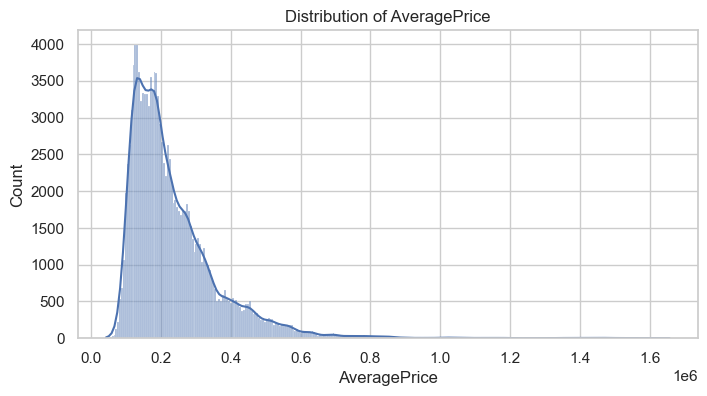

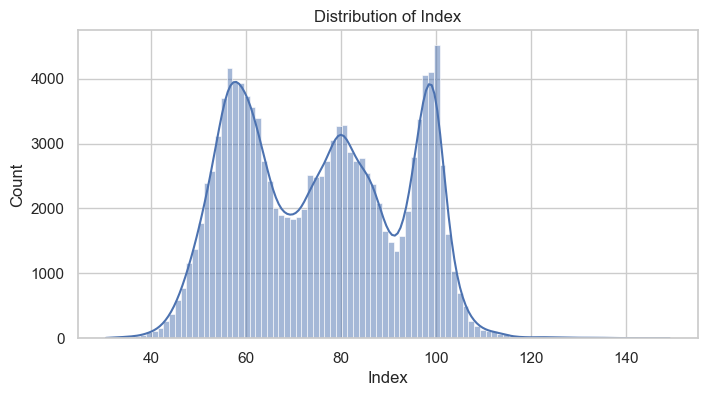

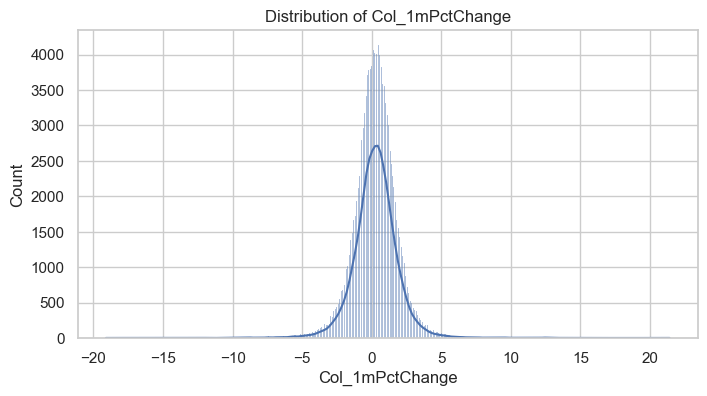

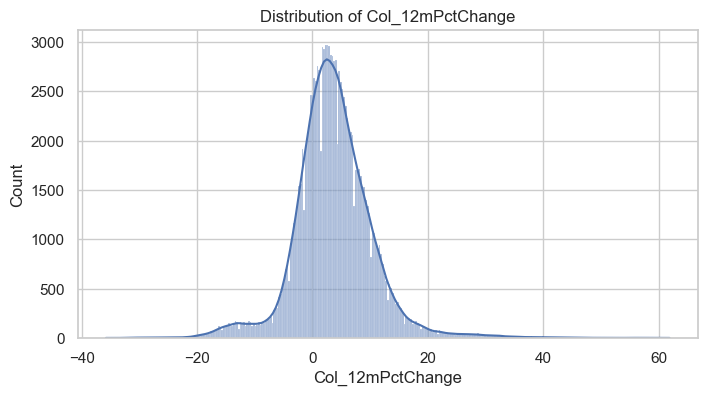

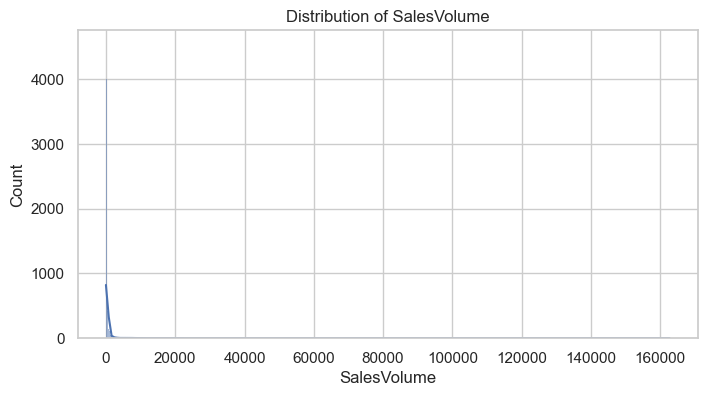

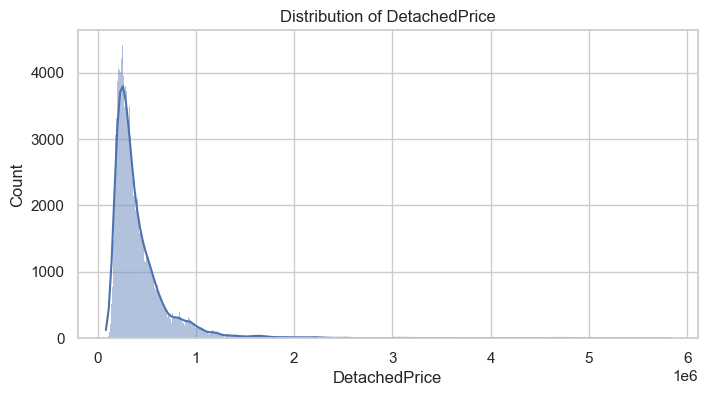

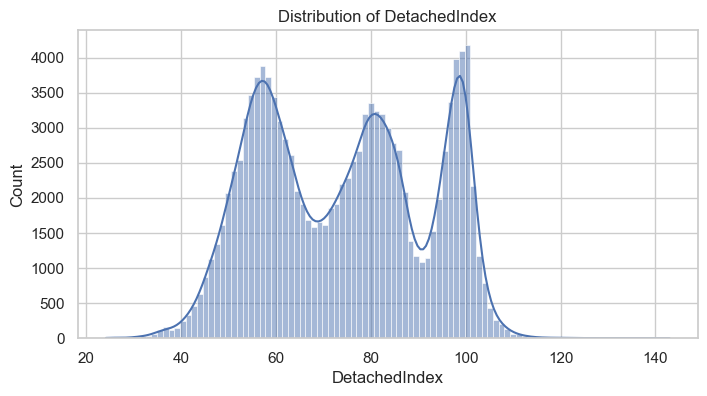

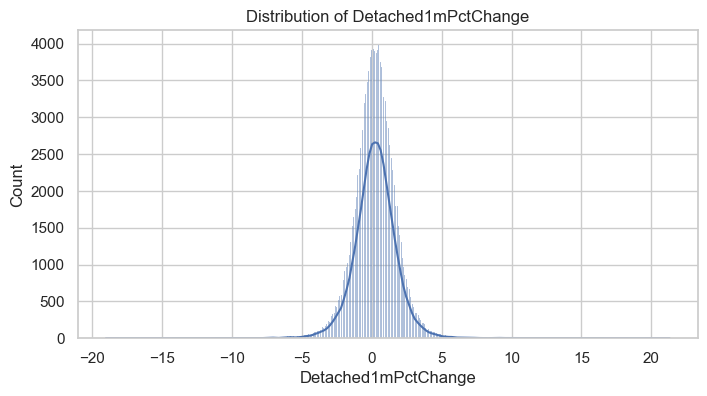

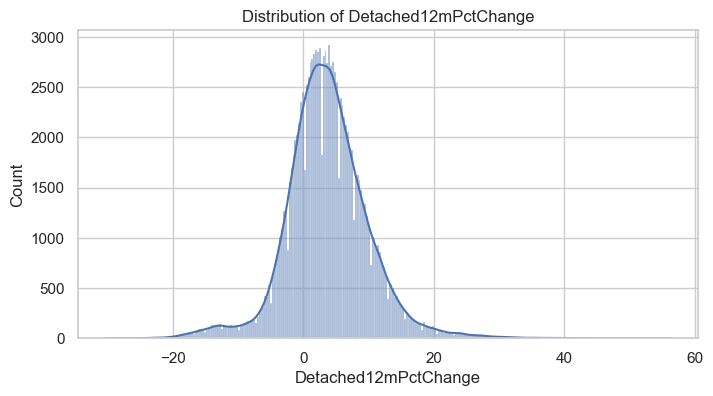

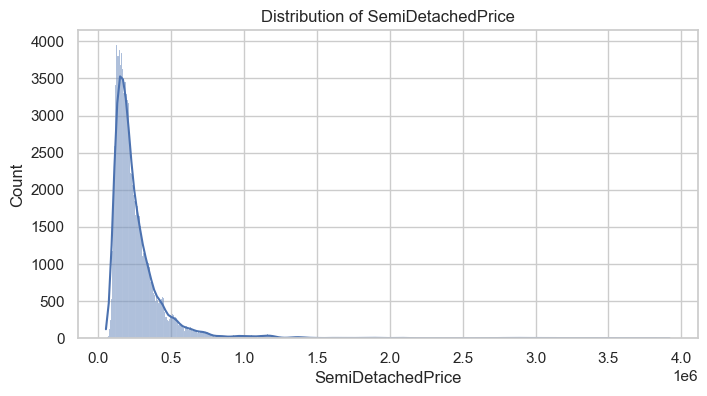

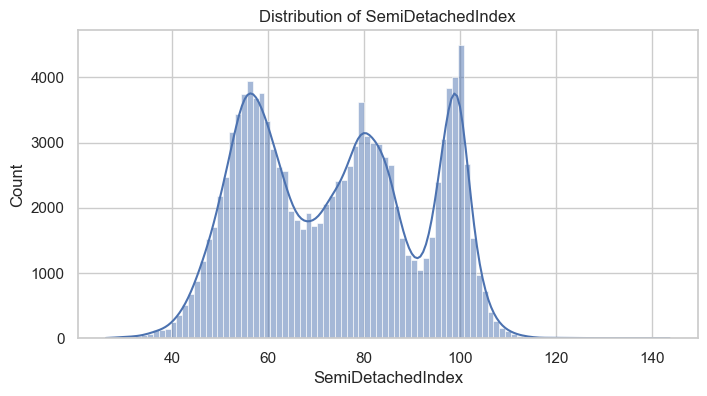

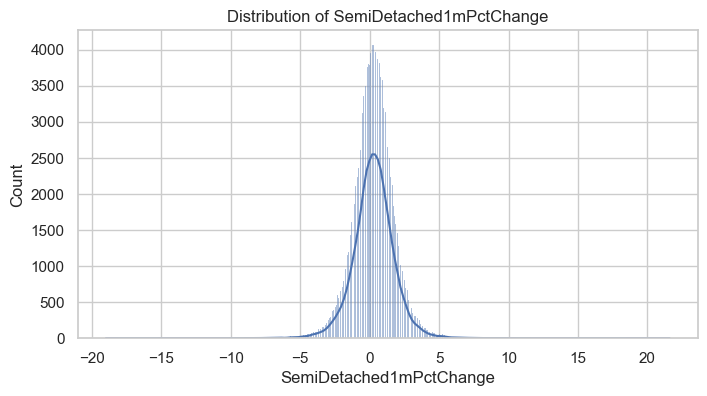

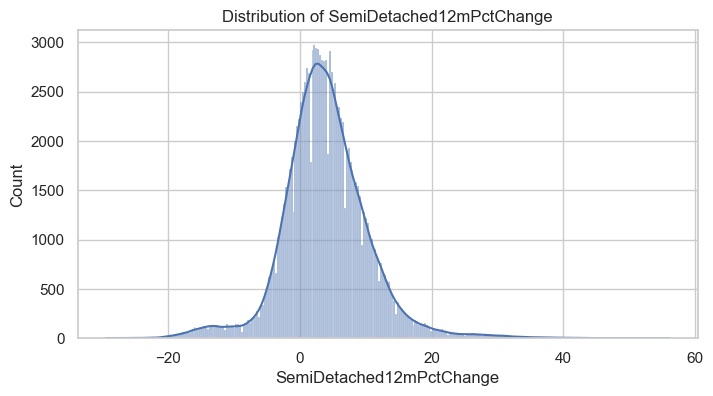

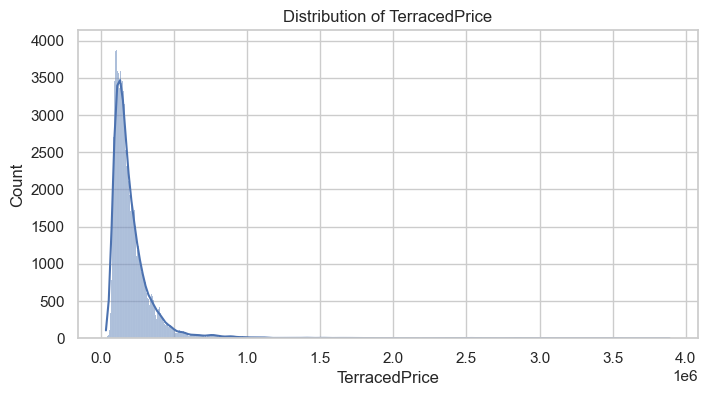

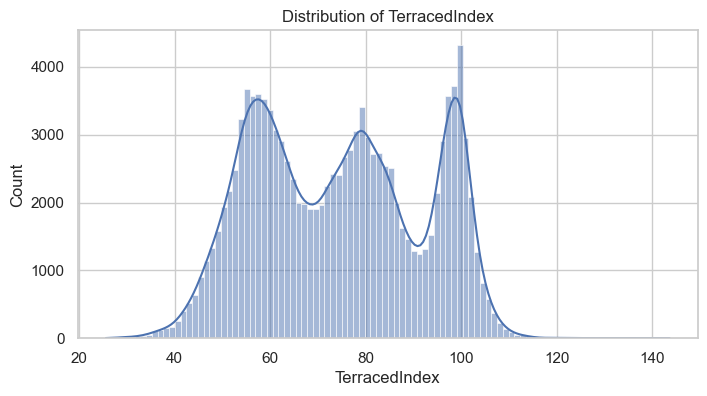

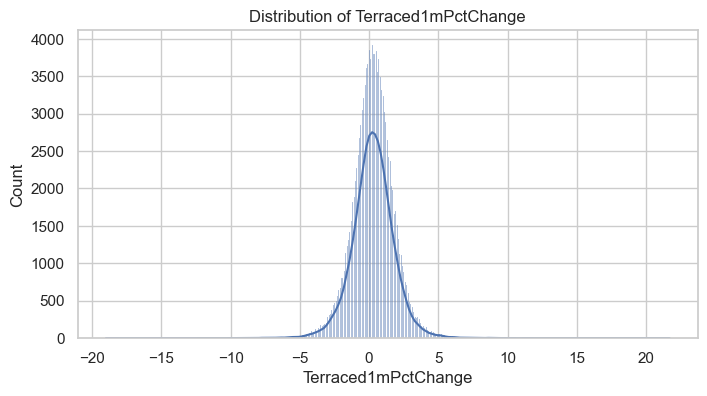

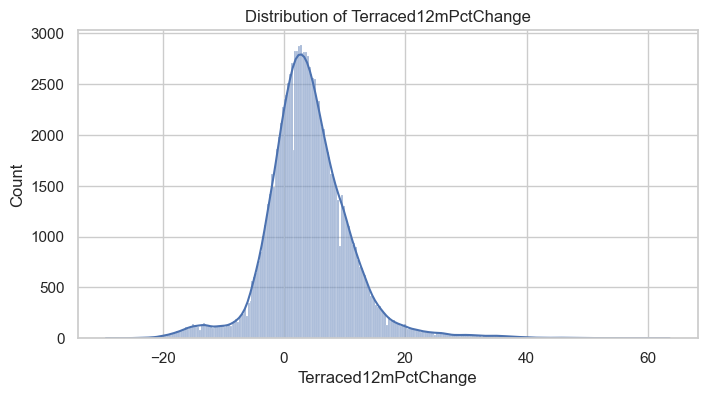

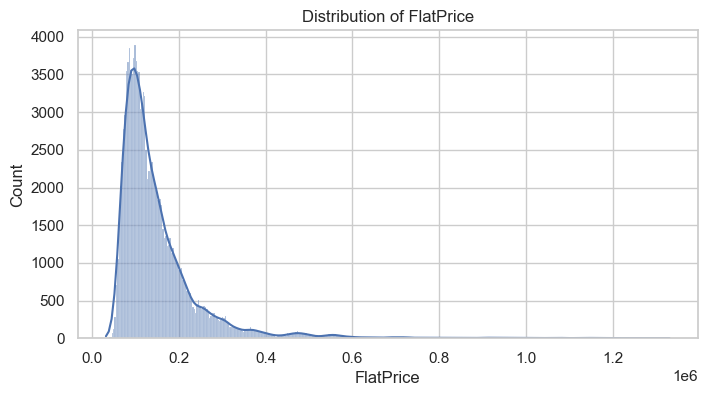

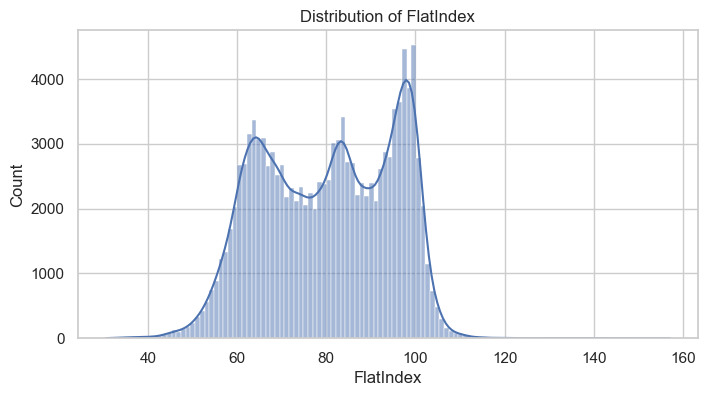

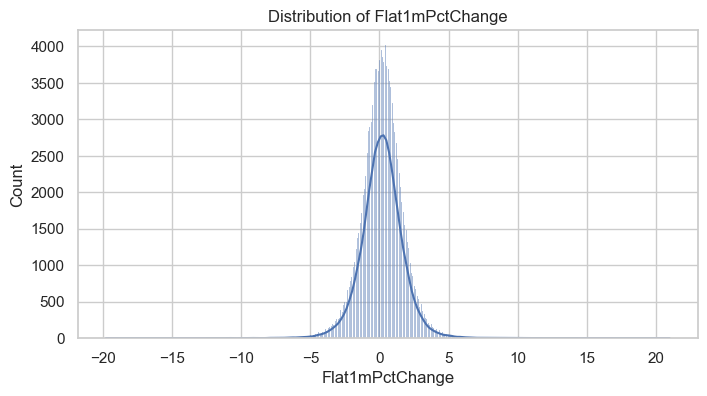

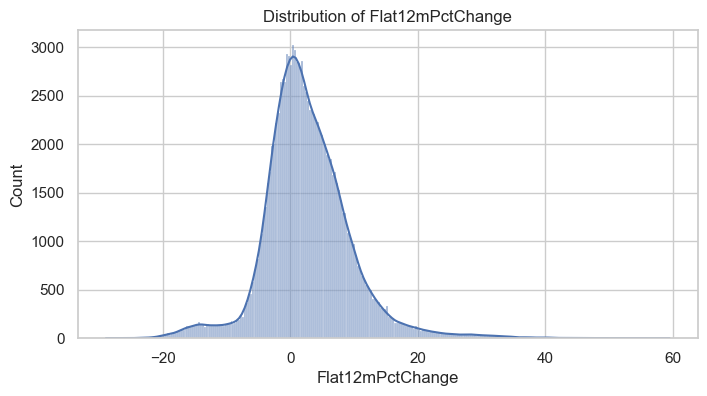

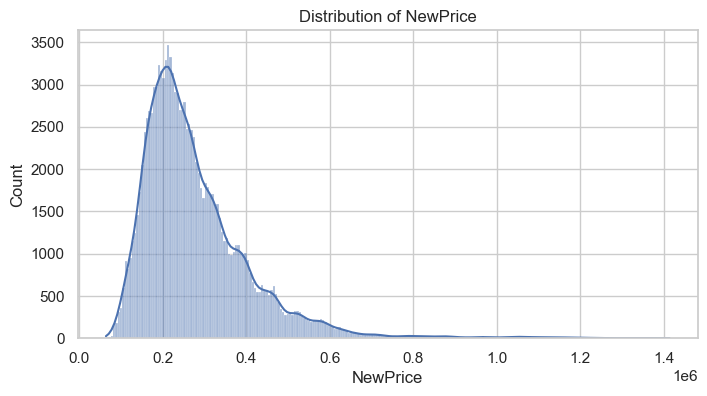

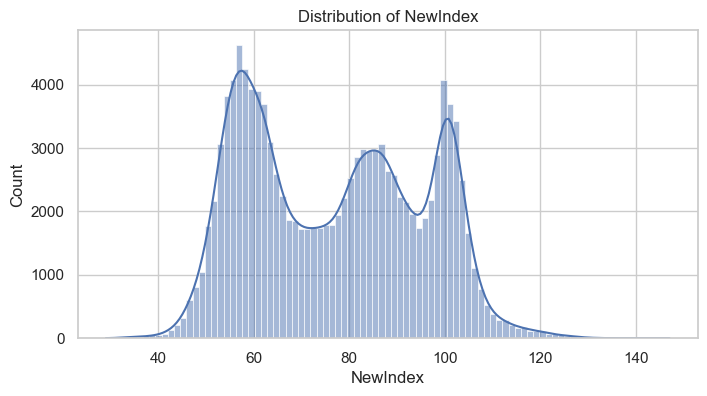

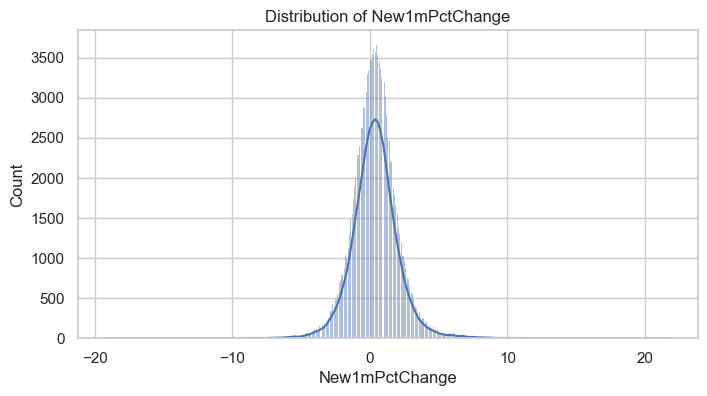

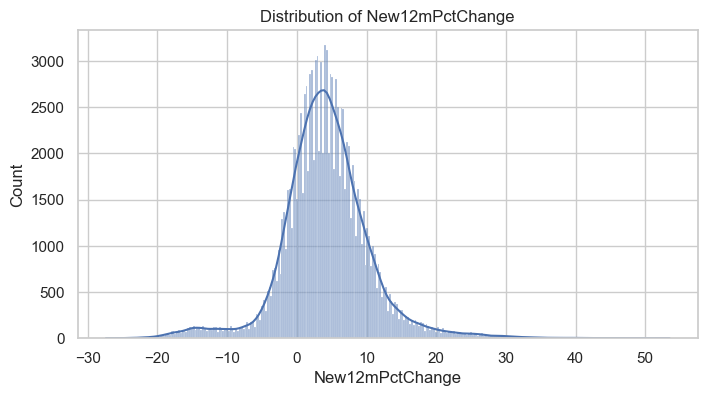

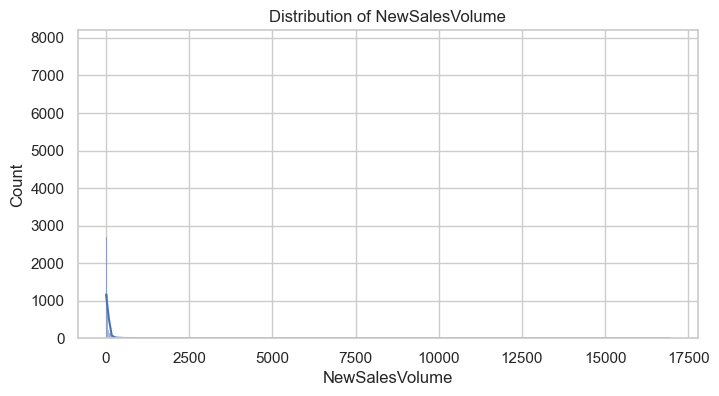

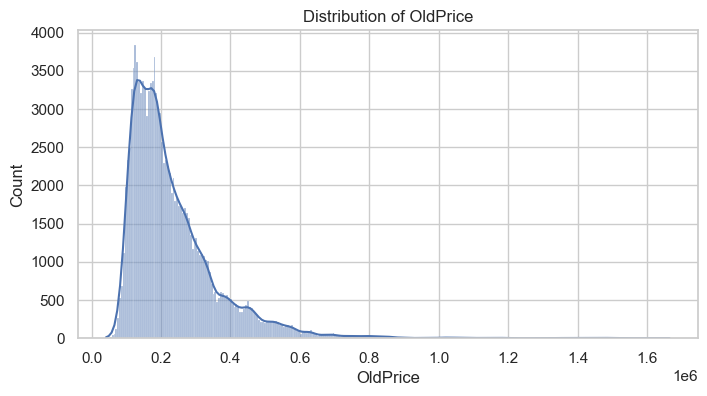

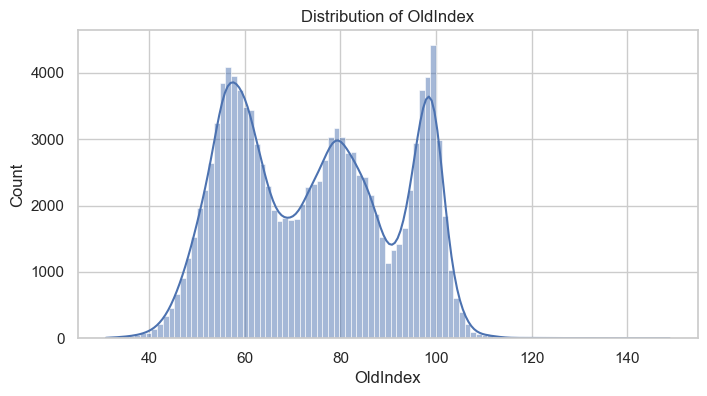

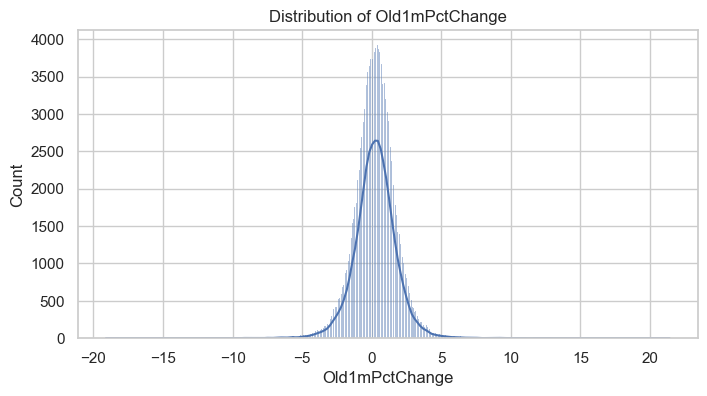

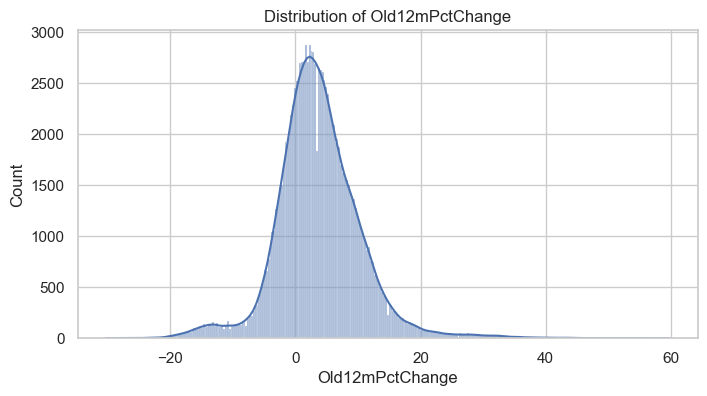

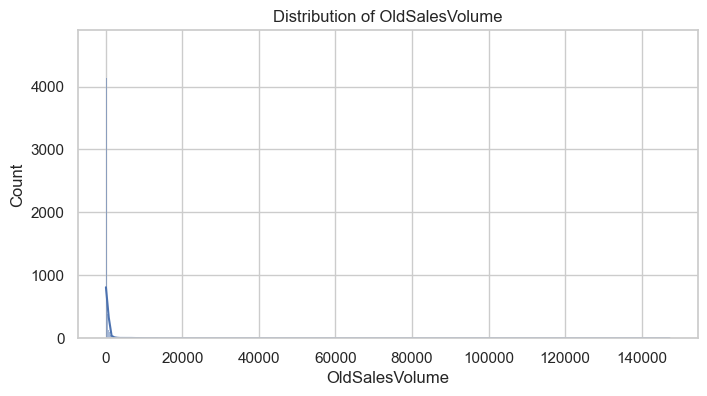

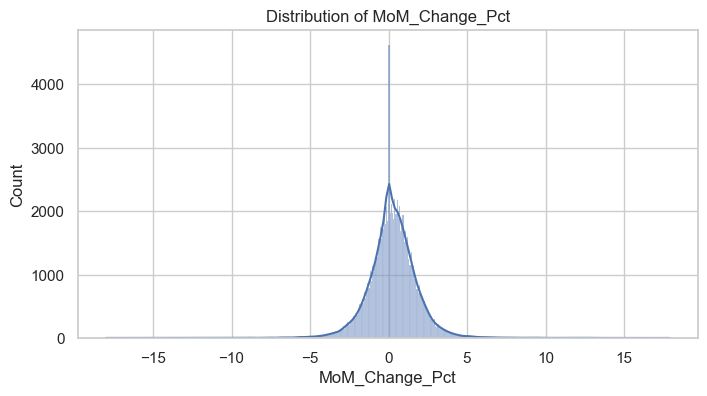

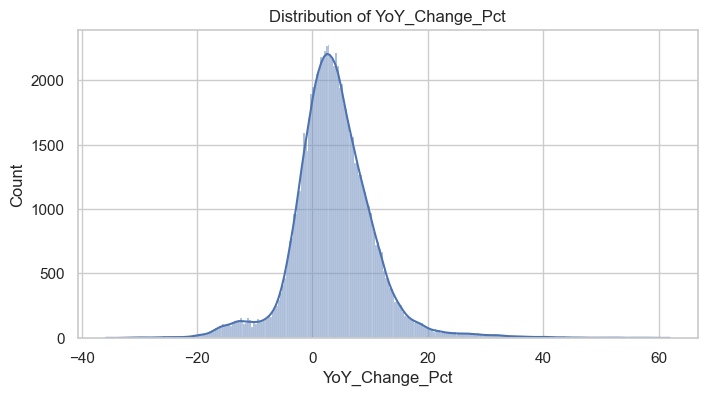

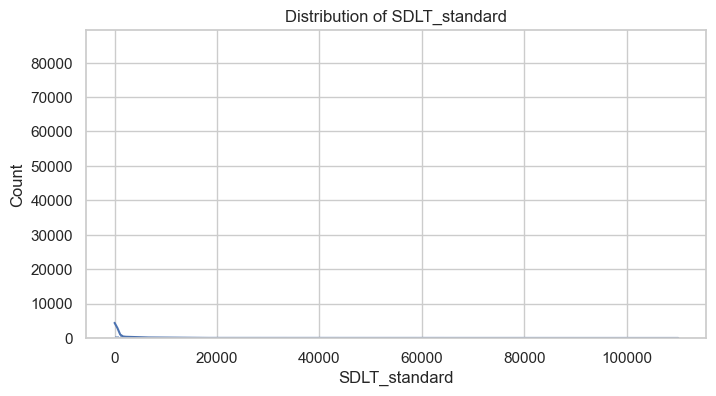

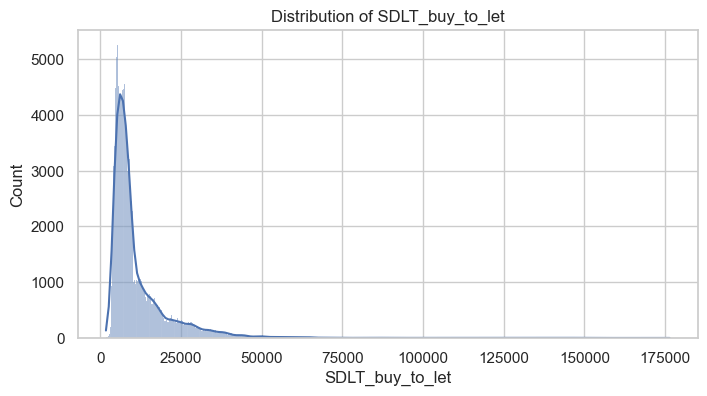

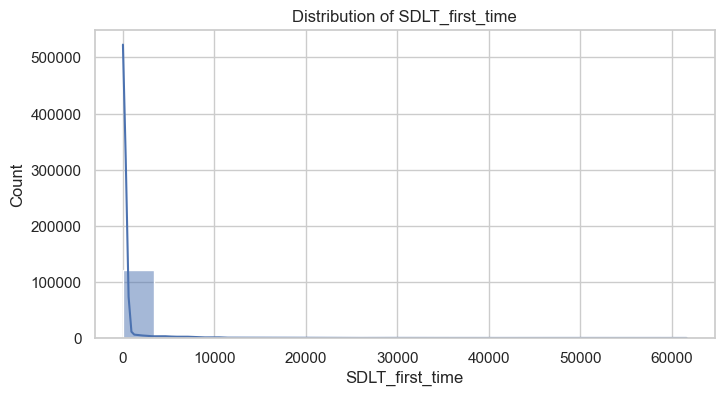

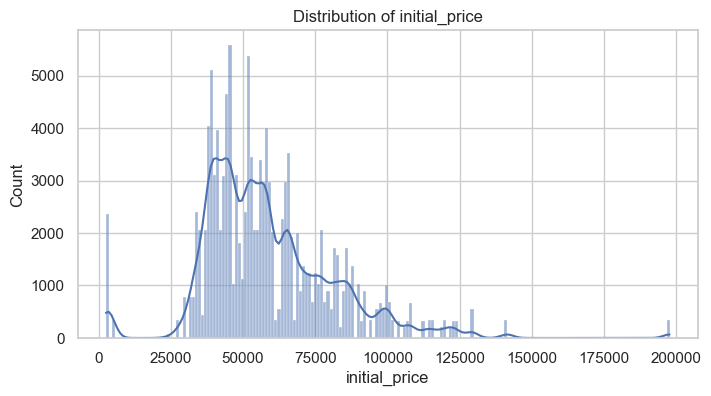

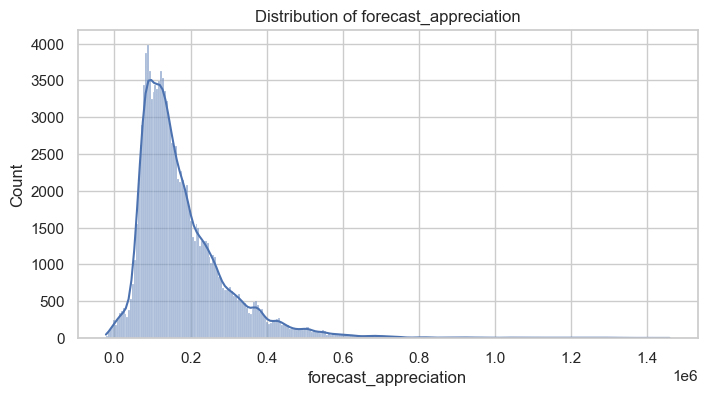

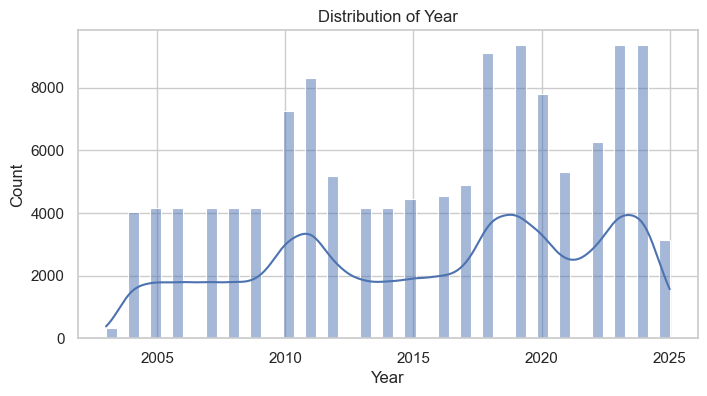

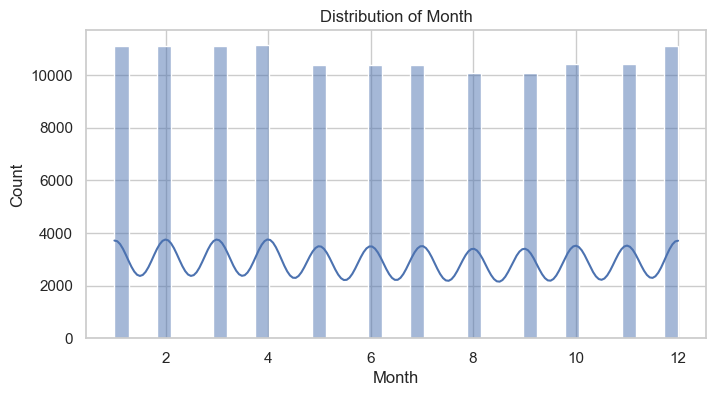

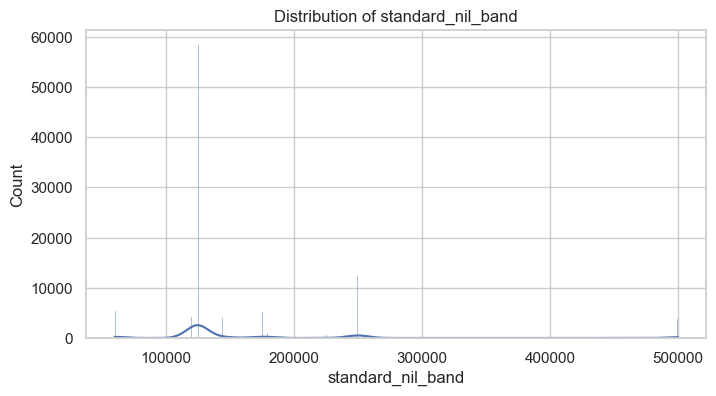

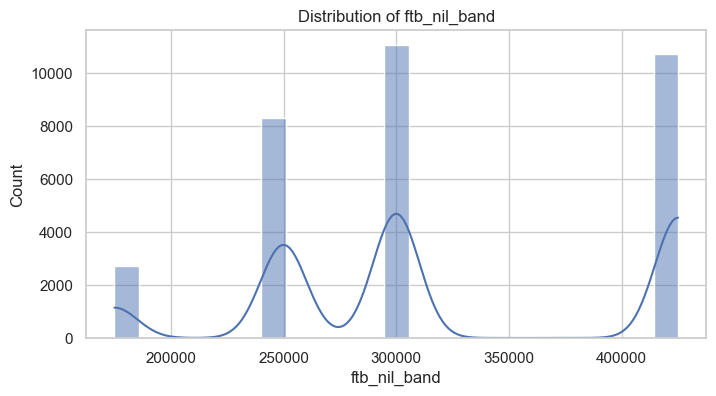

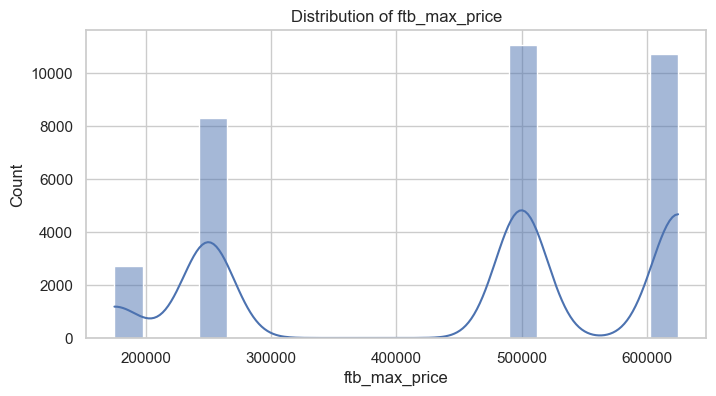

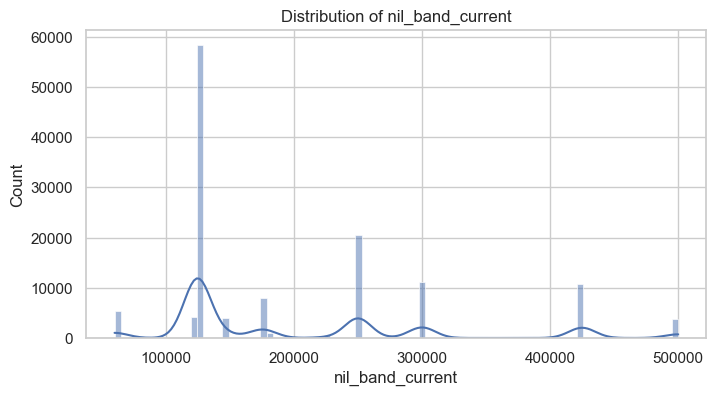

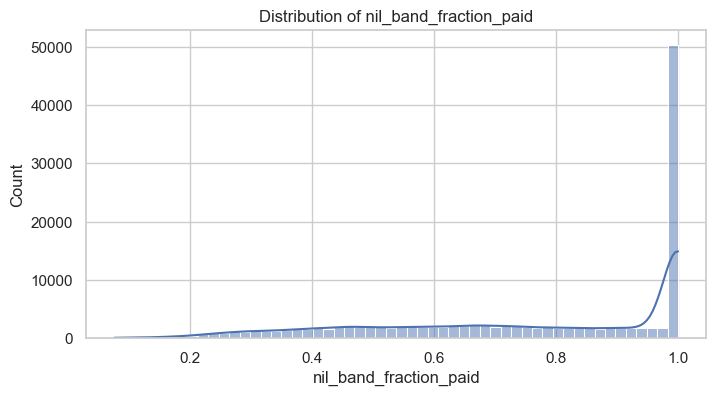

In [8]:
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

## 6. Time series analysis


# 6.1 Trend of AveragePrice

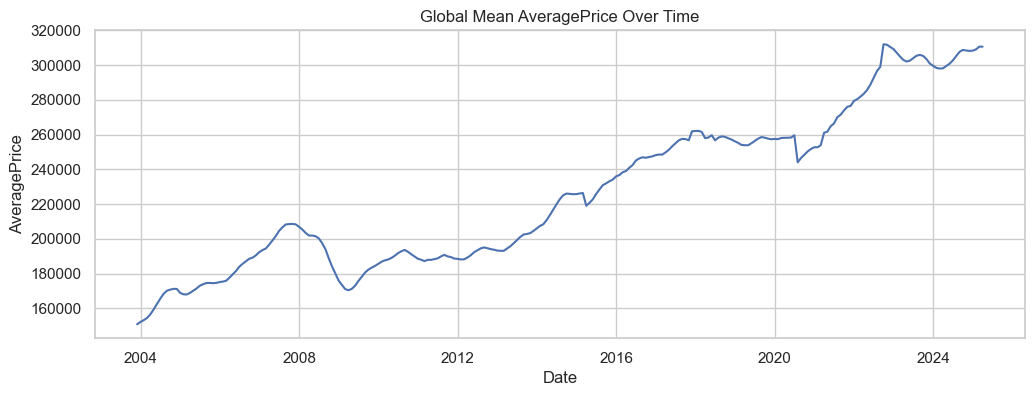

In [10]:

price_ts = df.groupby('Date')['AveragePrice'].mean()
plt.figure(figsize=(12,4))
plt.plot(price_ts.index, price_ts.values)
plt.title('Global Mean AveragePrice Over Time')
plt.xlabel('Date')
plt.ylabel('AveragePrice')
plt.show()

# 6.2 Trend of Index


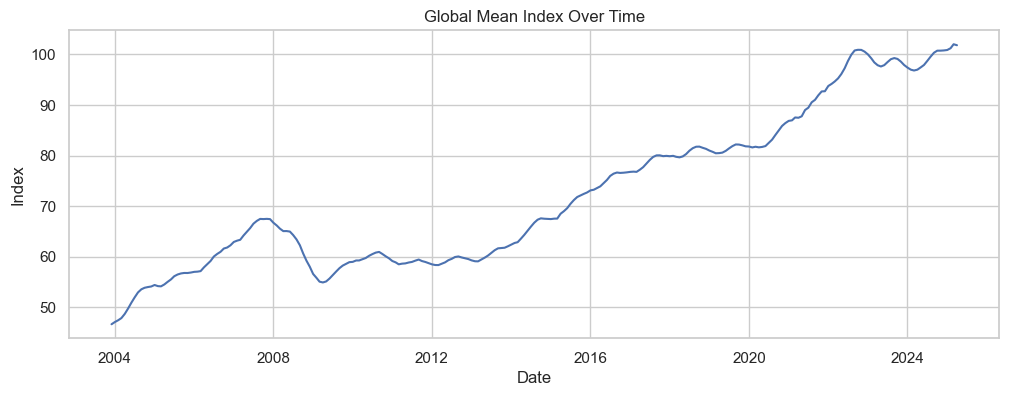

In [11]:

index_ts = df.groupby('Date')['Index'].mean()
plt.figure(figsize=(12,4))
plt.plot(index_ts.index, index_ts.values)
plt.title('Global Mean Index Over Time')
plt.xlabel('Date')
plt.ylabel('Index')
plt.show()

# 6.3 Seasonality (month-level)


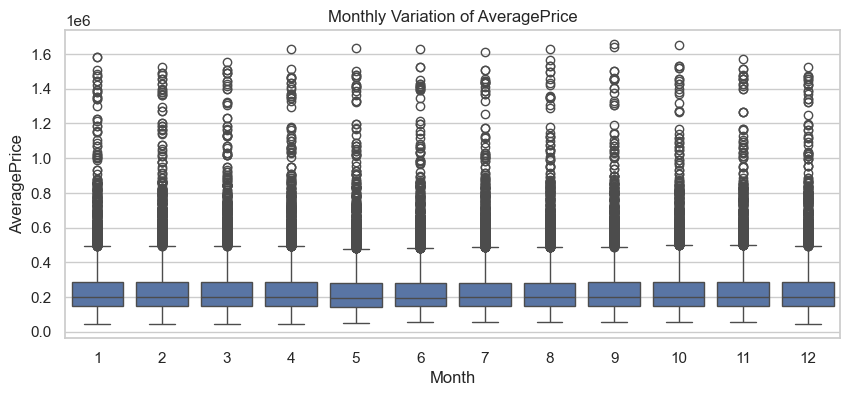

In [12]:

# 6.3 Seasonality (month-level)
df['month'] = df['Date'].dt.month
plt.figure(figsize=(10,4))
sns.boxplot(x='month', y='AveragePrice', data=df)
plt.title('Monthly Variation of AveragePrice')
plt.xlabel('Month')
plt.ylabel('AveragePrice')
plt.show()
    

## 7. Correlation & heatmap


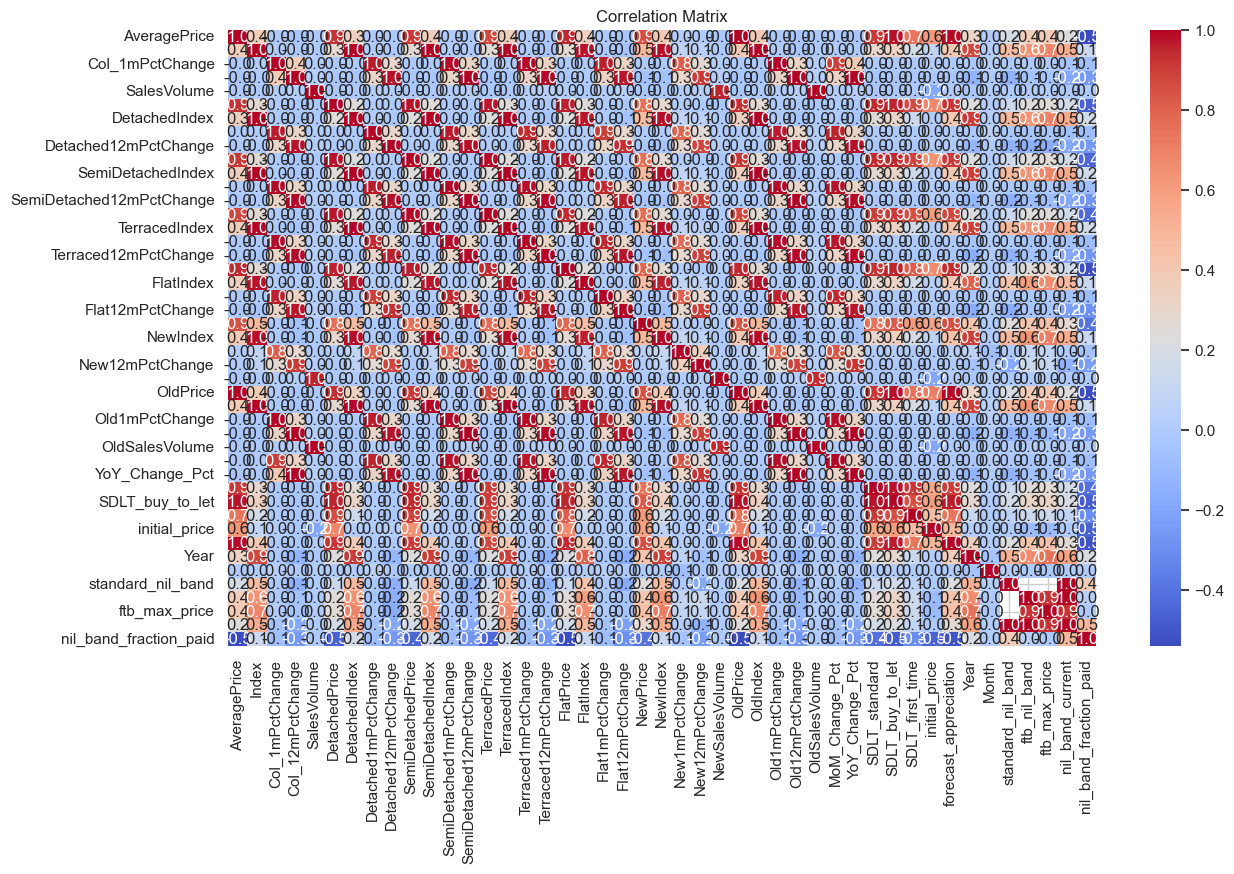

In [15]:
## 7. Correlation & heatmap
corr = df[num_cols].corr()
plt.figure(figsize=(14,8))
sns.heatmap(corr, annot=True, fmt='.1f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [25]:
corr

AveragePrice     Index  Col_1mPctChange  \
AveragePrice                  1.000000  0.374241        -0.009539   
Index                         0.374241  1.000000         0.018896   
Col_1mPctChange              -0.009539  0.018896         1.000000   
Col_12mPctChange             -0.027373 -0.003927         0.369436   
SalesVolume                  -0.015918 -0.013840         0.015536   
DetachedPrice                 0.926936  0.283971        -0.010821   
DetachedIndex                 0.348956  0.995568        -0.003822   
Detached1mPctChange           0.000972  0.011319         0.968865   
Detached12mPctChange         -0.006030 -0.012861         0.307334   
SemiDetachedPrice             0.911005  0.271873        -0.009039   
SemiDetachedIndex             0.356772  0.997345         0.000079   
SemiDetached1mPctChange      -0.000684  0.008880         0.990647   
SemiDetached12mPctChange     -0.013338 -0.014755         0.321199   
TerracedPrice                 0.878770  0.268496        -0.008611   
TerracedIndex                 0.363789  0.997174         0.001050   
Terraced1mPctChange          -0.010217 -0.008415         0.988086   
Terraced12mPctChange         -0.030813 -0.039607         0.322990   
FlatPrice                     0.949954  0.270434        -0.005286   
FlatIndex                     0.355237  0.978338         0.005863   
Flat1mPctChange              -0.005990 -0.005470         0.960121   
Flat12mPctChange             -0.027033 -0.044945         0.314873   
NewPrice                      0.855566  0.487851        -0.013302   
NewIndex                      0.395973  0.987821        -0.008516   
New1mPctChange                0.022623  0.085441         0.810630   
New12mPctChange              -0.003988  0.053391         0.274936   
NewSalesVolume               -0.016629 -0.005779         0.013840   
OldPrice                      0.999571  0.384133        -0.009951   
OldIndex                      0.387091  0.999682        -0.000365   
Old1mPctChange               -0.011241 -0.005520         0.997166   
Old12mPctChange              -0.036445 -0.037780         0.322086   
OldSalesVolume               -0.019199 -0.012568         0.017574   
MoM_Change_Pct               -0.008479  0.005601         0.900060   
YoY_Change_Pct               -0.024112 -0.004787         0.391303   
SDLT_standard                 0.912627  0.291338        -0.012108   
SDLT_buy_to_let               0.976335  0.338825        -0.011113   
SDLT_first_time               0.745802  0.175438        -0.008201   
initial_price                 0.618014  0.081356         0.008516   
forecast_appreciation         0.989068  0.398272        -0.012139   
Year                          0.329318  0.875547        -0.020905   
Month                         0.004823  0.017248         0.029638   
standard_nil_band             0.192963  0.468061        -0.009250   
ftb_nil_band                  0.368605  0.642757        -0.007053   
ftb_max_price                 0.390757  0.690192         0.013183   
nil_band_current              0.240872  0.531045        -0.051873   
nil_band_fraction_paid       -0.539652  0.132592        -0.075201   

                          Col_12mPctChange  SalesVolume  DetachedPrice  \
AveragePrice                     -0.027373    -0.015918       0.926936   
Index                            -0.003927    -0.013840       0.283971   
Col_1mPctChange                   0.369436     0.015536      -0.010821   
Col_12mPctChange                  1.000000     0.029157      -0.031937   
SalesVolume                       0.029157     1.000000      -0.017619   
DetachedPrice                    -0.031937    -0.017619       1.000000   
DetachedIndex                    -0.033139    -0.012102       0.241064   
Detached1mPctChange               0.308606     0.013996       0.002381   
Detached12mPctChange              0.977924     0.023350       0.000733   
SemiDetachedPrice                -0.029106    -0.020293       0.980521   
SemiDetachedIndex                -0.0

## 8. Regional comparisons



# Top regions by mean AveragePrice


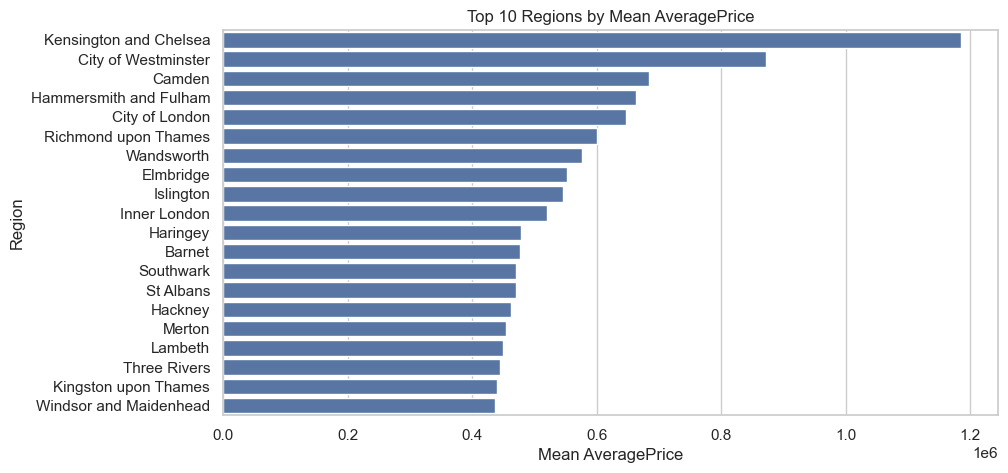

In [26]:

top_regions = df.groupby('RegionName_x')['AveragePrice'].mean().nlargest(20)
plt.figure(figsize=(10,5))
sns.barplot(x=top_regions.values, y=top_regions.index)
plt.title('Top 10 Regions by Mean AveragePrice')
plt.xlabel('Mean AveragePrice')
plt.ylabel('Region')
plt.show()

## 9. Tax relief analysis


# 9.1 Categorical breakdowns


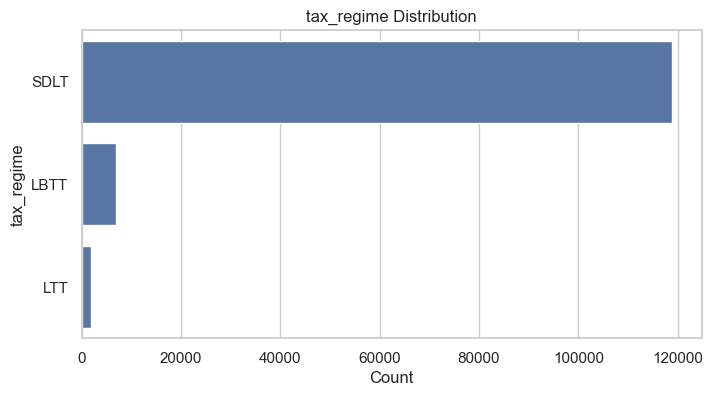

C:\Users\i2213\testpytorch\env1\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


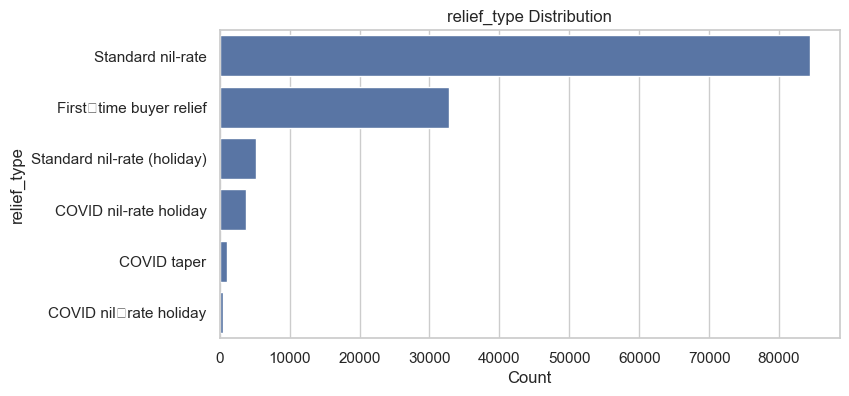

In [20]:
cat_cols = ['tax_regime', 'relief_type']
for col in cat_cols:
    if col in df.columns:
        plt.figure(figsize=(8,4))
        sns.countplot(y=col, data=df, order=df[col].value_counts().index)
        plt.title(f'{col} Distribution')
        plt.xlabel('Count')
        plt.ylabel(col)
        plt.show()

# Summary of tax relief amounts (numeric)


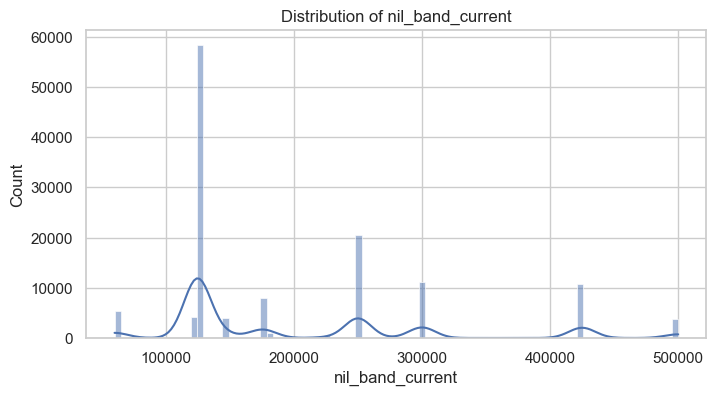

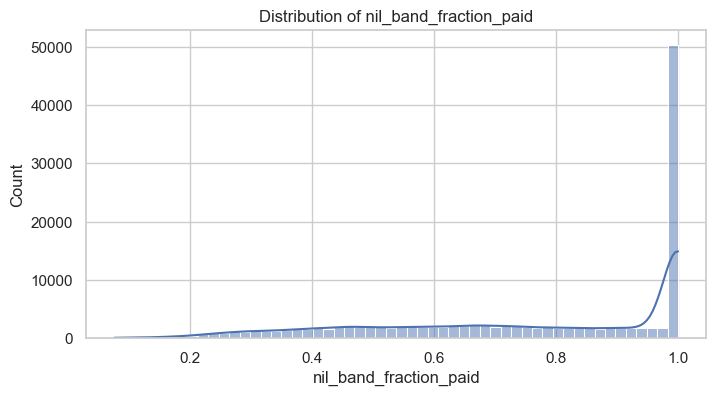

In [21]:
tax_cols = ['sdlt_amount_standard','sdlt_amount_ftb','nil_band_current','nil_band_fraction_paid','cgt_triggered']
for col in tax_cols:
    if col in df.columns:
        plt.figure(figsize=(8,4))
        sns.histplot(df[col].dropna(), kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()


# 9.2 Numeric tax relief distributions


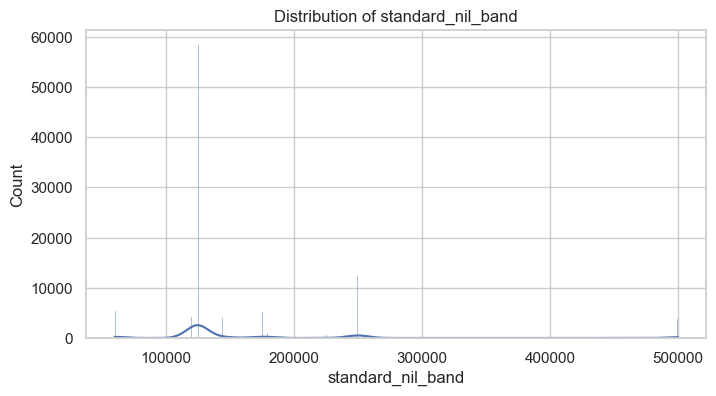

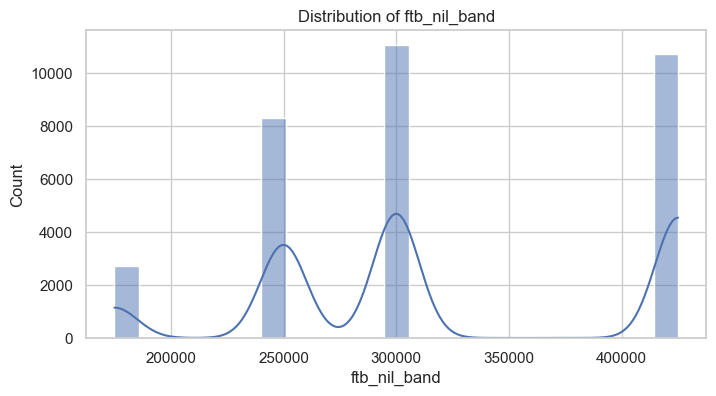

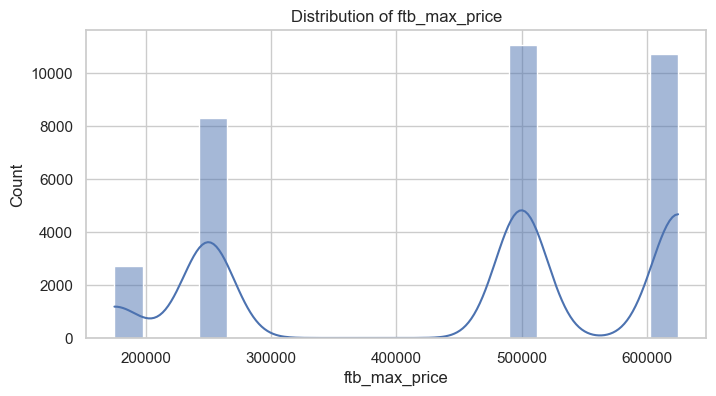

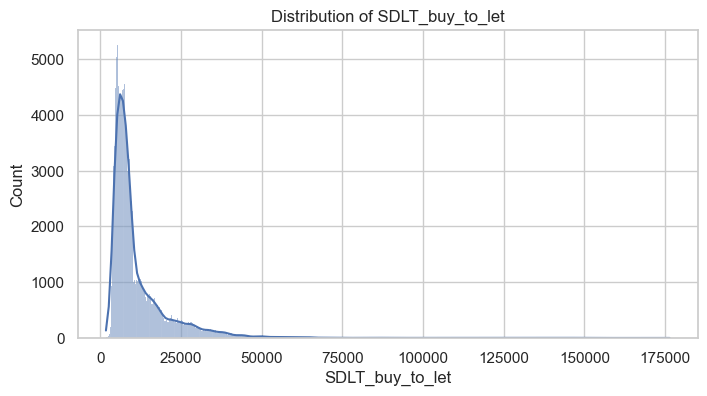

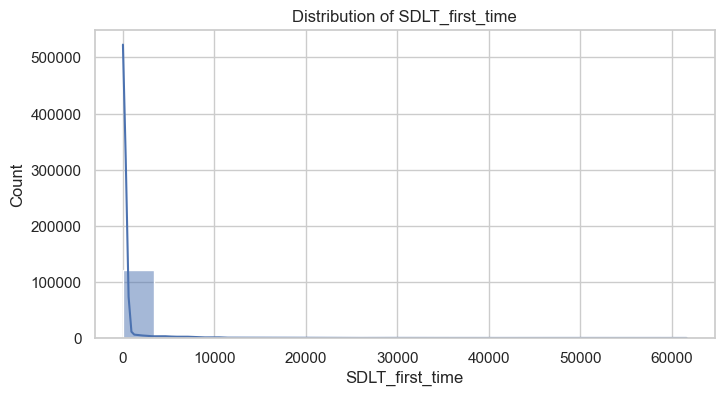

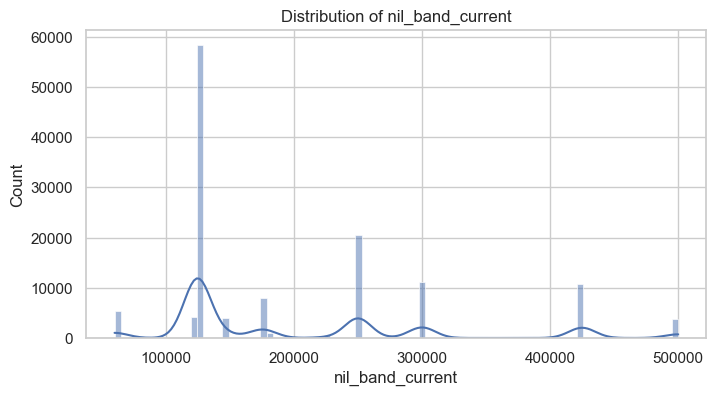

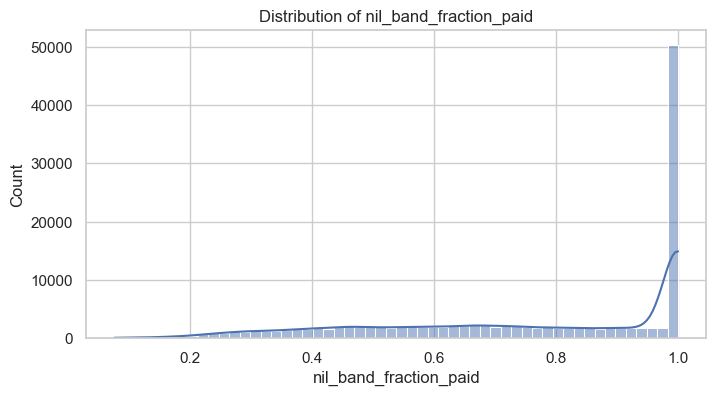

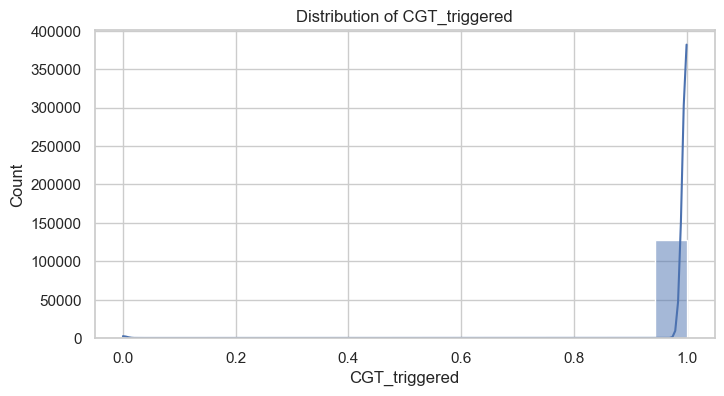

In [22]:
tax_numeric = ['standard_nil_band', 'ftb_nil_band', 'ftb_max_price',
               'sdlt_standard', 'SDLT_buy_to_let', 'SDLT_first_time',
               'nil_band_current', 'nil_band_fraction_paid', 'CGT_triggered']
for col in tax_numeric:
    if col in df.columns:
        plt.figure(figsize=(8,4))
        sns.histplot(df[col].dropna(), kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()



# 9.3 Relationships with AveragePrice


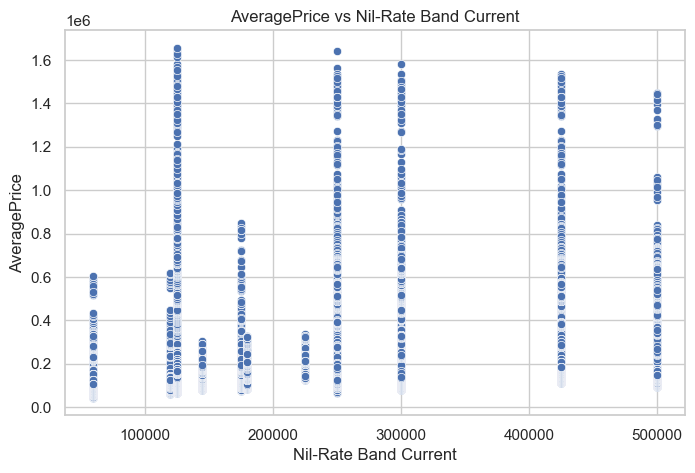

In [23]:
# Scatter of nil_band_current vs AveragePrice
if 'nil_band_current' in df.columns:
    plt.figure(figsize=(8,5))
    sns.scatterplot(x='nil_band_current', y='AveragePrice', data=df)
    plt.title('AveragePrice vs Nil-Rate Band Current')
    plt.xlabel('Nil-Rate Band Current')
    plt.ylabel('AveragePrice')
    plt.show()



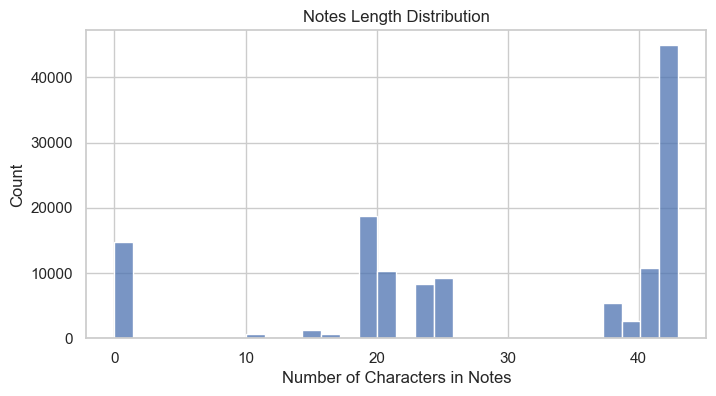

In [24]:
# 9.4 Notes word count distribution
if 'notes' in df.columns:
    df['notes_len'] = df['notes'].fillna('').apply(len)
    plt.figure(figsize=(8,4))
    sns.histplot(df['notes_len'], bins=30)
    plt.title('Notes Length Distribution')
    plt.xlabel('Number of Characters in Notes')
    plt.ylabel('Count')
    plt.show()

In [ ]:
## 10. Save processed data for embedding stage
processed = df.copy()
processed.to_csv('processed_hpi_with_tax_reliefs.csv', index=False)
print('Processed data saved for next steps.')
```


In [27]:
processed = df.copy()

In [28]:
processed


Date RegionName_x   AreaCode  AveragePrice  Index  \
0      2003-12-01   Hartlepool  E06000001         65449   51.2   
1      2004-01-01   Hartlepool  E06000001         64995   50.9   
2      2004-02-01   Hartlepool  E06000001         66836   52.3   
3      2004-03-01   Hartlepool  E06000001         66683   52.2   
4      2004-04-01   Hartlepool  E06000001         70779   55.4   
...           ...          ...        ...           ...    ...   
127794 2024-12-01        Wales  W92000004        206650  102.4   
127795 2025-01-01        Wales  W92000004        208159  103.1   
127796 2025-02-01        Wales  W92000004        207967  103.0   
127797 2025-03-01        Wales  W92000004        209528  103.8   
127798 2025-04-01        Wales  W92000004        210077  104.1   

        Col_1mPctChange  Col_12mPctChange  SalesVolume  DetachedPrice  \
0                   2.1              31.6        235.0       123585.0   
1                  -0.7              26.6        188.0       122601.0   
2                   2.8              27.1        155.0       125753.0   
3                  -0.2              26.7        199.0       125488.0   
4                   6.1              31.7        228.0       131391.0   
...                 ...               ...          ...            ...   
127794             -1.2               2.3       2598.0       325260.0   
127795              0.7               5.2       1921.0       327717.0   
127796             -0.1               4.4       2045.0       326426.0   
127797              0.8               4.3          NaN       323835.0   
127798              0.3               5.3          NaN       329732.0   

        DetachedIndex  ...  tax_regime        relief_type  standard_nil_band  \
0                53.3  ...        SDLT  Standard nil-rate            60000.0   
1                52.8  ...        SDLT  Standard nil-rate            60000.0   
2                54.2  ...        SDLT  Standard nil-rate            60000.0   
3                54.1  ...        SDLT  Standard nil-rate            60000.0   
4                56.6  ...        SDLT  Standard nil-rate            60000.0   
...               ...  ...         ...                ...                ...   
127794          101.7  ...         LTT  Standard nil-rate           225000.0   
127795          102.5  ...         LTT  Standard nil-rate           225000.0   
127796          102.1  ...         LTT  Standard nil-rate           225000.0   
127797          101.2  ...         LTT  Standard nil-rate           225000.0   
127798          103.1  ...         LTT  Standard nil-rate           225000.0   

        ftb_nil_band  ftb_max_price                                   notes  \
0                NaN            NaN  Initial nil-rate band post 2003 reform   
1                NaN            NaN  Initial nil-rate band post 2003 reform   
2                NaN            NaN  Initial nil-rate band post 2003 reform   
3                NaN            NaN  Initial nil-rate band post 2003 reform   
4                NaN            NaN  Initial nil-rate band post 2003 reform   
...              ...            ...                                     ...   
127794           NaN            NaN                        Threshold raised   
127795           NaN            NaN                        Threshold raised   
127796           NaN            NaN                        Threshold raised   
127797           NaN            NaN                        Threshold raised   
127798           NaN            NaN                        Threshold raised   

        nil_band_current  nil_band_fraction_paid  month  notes_len  
0                60000.0                  0.9167     12         38  
1                60000.0                  0.9231      1         38  
2                60000.0                  0.8977      2         38  
3                60000.0                  0.8998      3         38  
4                60000.0                  0.8477      4         38  
...                

In [30]:
processed.columns

Index(['Date', 'RegionName_x', 'AreaCode', 'AveragePrice', 'Index',
       'Col_1mPctChange', 'Col_12mPctChange', 'SalesVolume', 'DetachedPrice',
       'DetachedIndex', 'Detached1mPctChange', 'Detached12mPctChange',
       'SemiDetachedPrice', 'SemiDetachedIndex', 'SemiDetached1mPctChange',
       'SemiDetached12mPctChange', 'TerracedPrice', 'TerracedIndex',
       'Terraced1mPctChange', 'Terraced12mPctChange', 'FlatPrice', 'FlatIndex',
       'Flat1mPctChange', 'Flat12mPctChange', 'NewPrice', 'NewIndex',
       'New1mPctChange', 'New12mPctChange', 'NewSalesVolume', 'OldPrice',
       'OldIndex', 'Old1mPctChange', 'Old12mPctChange', 'OldSalesVolume',
       'MoM_Change_Pct', 'YoY_Change_Pct', 'Nation', 'SDLT_standard',
       'SDLT_buy_to_let', 'SDLT_first_time', 'initial_price',
       'forecast_appreciation', 'CGT_triggered', 'Year', 'Month',
       'RegionName_y', 'nation', 'start_date', 'end_date', 'tax_regime',
       'relief_type', 'standard_nil_band', 'ftb_nil_band', 'ftb_max_p

In [ ]:
sdlt_amount_standard